<a href="https://colab.research.google.com/github/javierber/colab_proj_repo/blob/main/Project_1_Final(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Dictionary

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional Pandas resources at the end of this Chapter for more resources on this):
Missing Data, its types, and statistical methods to deal with it
6 Different Ways to Compensate for Missing Values In a Dataset
Dealing with missing data: Key assumptions and methods for applied analysis
Feel free to use any other resources or techniques you find online that you think are appropriate/useful
Here is the Data Dictionary for this dataset:

Variable Name	Description

*   **Item_Identifier**	=  Unique product ID
*   **Item_Weight**	 = Weight of product
*   **Item_Fat_Content**  =	Whether the product is low fat or regular
*   **Item_Visibility**  = 	The percentage of total display area of all products in a store allocated to the particular product
*   **Item_Type**	= The category to which the product belongs
*   **Item_MRP** =	Maximum Retail Price (list price) of the product
*   **Outlet_Identifier**	= Unique store ID
*   **Outlet_Establishment_Year**  =	The year in which store was established
*   **Outlet_Size**	= The size of the store in terms of ground area covered
*   **Outlet_Location_Type** =	The type of area in which the store is located
*   **Outlet_Type**	  =Whether the outlet is a grocery store or some sort of supermarket
*   **Item_Outlet_Sales**  =	Sales of the product in the particular store. This is the target variable to be predicted.

# LOAD

In [3]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from matplotlib import cm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
import pandas as pd
file = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(file, header =0)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**Project 1 - Cleanup

---



---



In [6]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [7]:
#2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [9]:
#4) Identify missing values.
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [10]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
#source:https://medium.com/analytics-vidhya/bigmart-dataset-sales-prediction-c1f1cdca9af1
# Replacing 0's with NaN
df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

# Now fill by mean of visbility based on item identifiers
df.Item_Visibility = df.Item_Visibility.fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

# Checking if Imputation was carried out successfully
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
crosstable = pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [13]:
dic = {'Grocery Store':'Small'}
s1 = df.Outlet_Type.map(dic)
df.Outlet_Size = df.Outlet_Size.combine_first(s1)
df.Outlet_Size.value_counts()       

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# Checking if imputation was successful
df.isnull().sum(axis=0) 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
dic = {"Tier 2":"Small"}
s2 = df.Outlet_Location_Type.map(dic)
df.Outlet_Size = df.Outlet_Size.combine_first(s2)
df.isnull().sum(axis=0)
df.Outlet_Size.value_counts()  

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df.Item_Identifier.value_counts().sum()

8523

In [66]:
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [17]:
#7) Find and fix any inconsistent categories of data 
#(example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('lf', 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'regular')
df['Item_Fat_Content'].value_counts(dropna=False)

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
#8) For any numerical columns, obtain the summary statistics
# of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070749,140.992782,1997.831867,2181.288914
std,4.643456,0.050313,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.031395,93.826500,1987.000000,834.247400
50%,12.600000,0.058100,143.012800,1999.000000,1794.331000
75%,16.850000,0.098867,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project 1 - Final (Core)

Project 1 - Final (Core)

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

**1)** Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.

**2)** Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse. 

**3)** You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.

**4)** To finalize this project, you need to prepare an executive (non-technical) presentation about your project.




**ADDTIONAL TASK**


 

*   Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
*   Do not include data cleaning, pre-processing, or exploration steps in your presentation.
*   Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
*   Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc).
*   Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.
*   Your presentation requires audio, but video is optional.
*   Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
*   Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
*   Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project.
*   Make sure you include your presentation slides and recording on your GitHub repo as well.





 

  






 

Define features (X) and target (y)

In [19]:
#Assigning the Target (y)
y = df['Item_Outlet_Sales']

#Assigning the Feature (X)
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Item_Weight', 'Outlet_Identifier'])



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,low fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,low fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,regular,0.022911,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store
4,low fat,0.016164,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [22]:
# define dictionary to replace
sizes = {'Small': 0, 'Medium': 1, 'High': 2}
fats = {'low fat':0, 'regular':1}

# apply the dictionary to the column in the train set
X_train['Outlet_Size'] = X_train['Outlet_Size'].replace(sizes)
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace(fats)

# apply the dictionary to the column in the test set
X_test['Outlet_Size'] = X_test['Outlet_Size'].replace(sizes)
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace(fats)
# view the dataframe to make sure it worked
X_train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,0,0.029565,Household,256.4646,2009,1,Tier 3,Supermarket Type2
7510,1,0.065917,Snack Foods,179.7660,2009,1,Tier 3,Supermarket Type2
5828,1,0.158716,Meat,157.2946,1999,1,Tier 1,Supermarket Type1
5327,0,0.014628,Baking Goods,82.3250,2004,0,Tier 2,Supermarket Type1
4810,0,0.016645,Frozen Foods,120.9098,2002,0,Tier 2,Supermarket Type1


In [23]:
#Instantiate NUMERICAL and CATEGORICAL data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
print('cat',cat_selector(X_train))
print('num',num_selector(X_train))


cat ['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
num ['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size']


In [24]:
#instantiate the encoder
freq_imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')



In [25]:
X_train.shape

(6392, 8)

In [26]:
#column transformer
num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, encoder)
print('cat', cat_pipe)
print('num', num_pipe)


cat Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])
num Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])


In [27]:
cat_pipe.fit_transform(X_train[cat_selector(X_train)]).shape

(6392, 23)

In [28]:
num_pipe.fit_transform(X_train[num_selector(X_train)]).shape

(6392, 5)

In [29]:
preprocess = make_column_transformer((cat_pipe, cat_selector), (num_pipe, num_selector))
preprocess

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2e0e7dc90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object a

In [30]:
X_train = preprocess.fit_transform(X_train)

In [31]:
X_train.shape

(6392, 28)

In [32]:
X_test = preprocess.transform(X_test)

In [33]:
X_test.shape

(2131, 28)

In [34]:
reg = LinearRegression()

#fit model on both the training features and training target
reg.fit(X_train, y_train)

LinearRegression()

Linear Regression Model


In [80]:
def evaluate_model(y_true, y_pred):
  'takes two arrays, true labels and predicted labels, and prints'
  'RMSE, and R2 metrics'
 
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred) 
  
  print(f'scores: \nRMSE: {rmse}, \nR2: {r2}')

  



In [81]:
# evaluate model
print(f'{evaluate_model(y_train, reg.predict(X_train))}')
print(f'{evaluate_model(y_test, reg.predict(X_test))}')

scores: 
RMSE: 1140.23043238183, 
R2: 0.5606876504550881
None
scores: 
RMSE: 1094.4274329515092, 
R2: 0.5658639847125961
None


Regression Tree Model

In [95]:
# Make an instance of the Model
dec_tree = DecisionTreeRegressor(max_depth=15, random_state=42)

In [96]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [97]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [98]:
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(f'{evaluate_model(y_train, train_preds)}')
print(f'{evaluate_model(y_test, test_preds)}')

scores: 
RMSE: 740.0890143888215, 
R2: 0.8149214572188905
None
scores: 
RMSE: 1316.0877848650157, 
R2: 0.3721995954349131
None


You need to determine which model to implement.

Overall, which model do you recommend? Justify your recommendation.

# After reviewing the Decision Tree model's **Test R2 score** was **0.372**. In  comparison with  Linear Regression model, which its initial **R2 score** for Test showed **0.565**.  

# This was a almost 40% imporovement with the Linear Regression model. Althought the decision tree eval model showed an R2 improvement after tuning, it didn't fair as wellin the the R2 of the testing data on the initial pass.  There were far better results in the Linear Regression model immediate modeling.

In [91]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 20)) # will try every value between 2 and 20

# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)


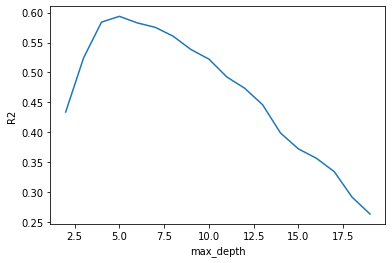

In [92]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [93]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(f'train: {train_5_score}')
print(f'test: {test_5_score}')

train: 0.6039274777060578
test: 0.5937325885458685


After tuning the Decision Tree model definitely faired better w/ a **R2 Test score** of **0.593**